### Webscraping Thailand stock (SET) financial data 
---
This notebook aim to storage financial data (statement, statistic) of all stock from www.set.com into dataframe as .csv separate by folder(statement, statistic).

Web Scraping by **Selenium webdriver chromewebdriver**.
<br>**<font color='red'>NOTE: before run below code make sure chromedriver is lastest version.
<br>(Download here: https://chromedriver.chromium.org/downloads )</font>**
---
#### Example of website page is below

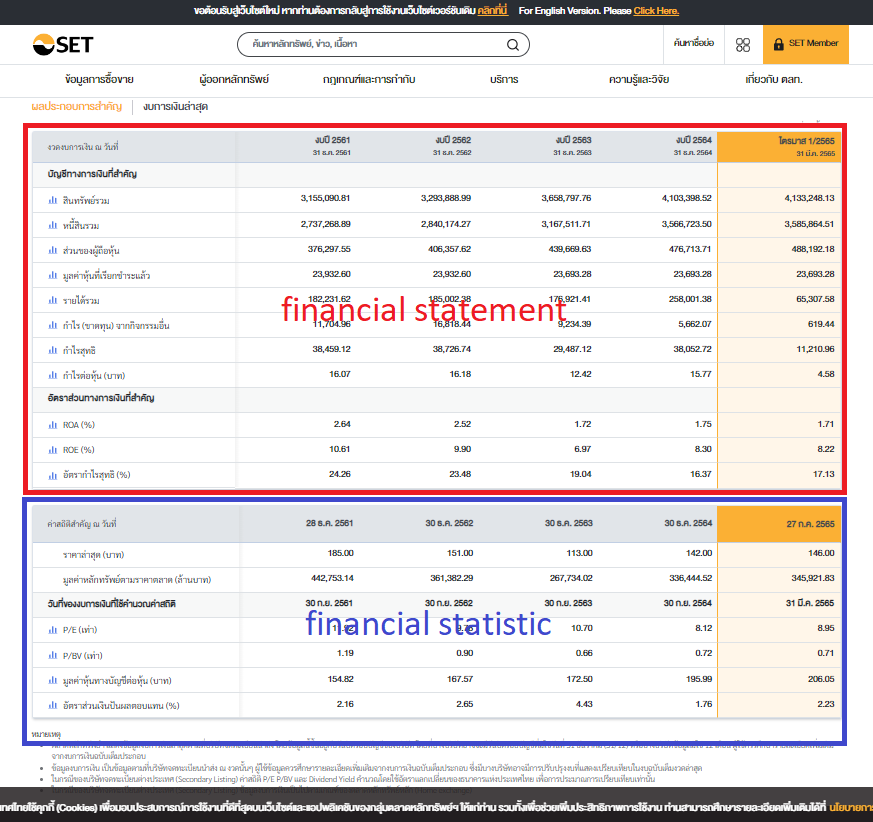

In [2]:
from IPython.display import Image
Image(filename='financials_table.png') 

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import numpy as np
import os
pd.options.display.float_format = '{:,.2f}'.format  # 123.4567 > 123.45

#### Create new folder name <font color=blue>'financials'</font> in current directory for store .csv file

In [4]:
newpath = r'financials' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
else :
    print('this folder name already exist')
    pass

this folder name already exist


#### <ins>Function webscraping</ins>
* Input
    * tickername
* output
    * tickername_financial_statement.csv
    * tickername_financial_statistic.csv

In [5]:
def stock_set_financials_to_excel(ticker):   

    url = f'https://www.set.or.th/th/market/product/stock/quote/{ticker}/financial-statement/company-highlights'

    #initiate Webdriver
    driver = webdriver.Chrome()  # Optional argument, if not specified will search path.
    driver.get(url)
    driver.implicitly_wait(0.5)

    #table 1 columns name
    t1colfirst = driver.find_element(by='xpath',value="//table/thead/tr/th/div[@class='fs-13px fw-normal ps-0 ps-md-3']").text
    t1colmid_list = driver.find_elements(by='xpath',value="//b[@class='head-year fs-20px']")
    t1colmid_list = [i.text for i in t1colmid_list]
    t1collast = driver.find_element(by='xpath',value="//b[@class='head-year title-font-family fs-20px']").text
    #Create table 1 colname_list
    t1collist = []
    t1collist.append(t1colfirst)
    for item in t1colmid_list:
        t1collist.append(item)
    t1collist.append(t1collast)

    #table 2 columns name 
    t2colfirst = driver.find_elements(by='xpath',value="//div[@class='fs-13px fw-normal ps-0 ps-md-3']")[1].text
    t2colmid_list = driver.find_elements(by='xpath',value="//b[@class='head-year title-font-family fs-20px lh-lg']")
    t2colmid_list = [i.text for i in t2colmid_list]
    #Create table2 col name list
    t2collist = []
    t2collist.append(t2colfirst)
    for item in t2colmid_list:
        t2collist.append(item)
        
    #list of INDEX
    list_index = driver.find_elements(by='xpath',value="//td[@class='table-b-table-default b-table-sticky-column text-start column-sticky mnxw-190 text-wrap']/div")
    #table1[10-22]
    table1_index = [i.text for i in list_index[10:23]]
    #table2[33-39]
    table2_index = [i.text for i in list_index[33:40]]
    
    
    
    
    #list of DATA
    data = driver.find_elements(by='xpath',value="//div[@class='ps-0 ps-md-3']")
    list_data = [i.text for i in data]

    
        
    driver.close()

    # Create Dataframe by Pandas
    #list Data 1
    arr1 = np.array(list_data[:(11*(len(t1collist)-1))])
    arr1 = arr1.reshape(11, len(t1collist)-1)
    df1 = pd.DataFrame(arr1)
    df1
    #list Data 2
    arr2 = np.array(list_data[(11*(len(t1collist)-1)):])
    arr2 = arr2.reshape(7, len(t2collist)-1)
    df2 = pd.DataFrame(arr2)
    df2


    #TABLE 1
    #split and combine index
    table1_dataindex = table1_index[1:9]+table1_index[10:]
    table1_dataindex
    

    #Add index columns
    df1['index'] = table1_dataindex
    df1
    # shift column 'index' to first position
    first_column = df1.pop('index') 
    # insert column using insert(position,column_name,first_column) function
    df1.insert(0, 'index', first_column)
    #Change dtype to float
    df1 = df1.replace('-',np.nan).replace(',','',regex=True)
    df1.iloc[:,1:] = df1.iloc[:,1:].astype(float)
    #Change col names
    df1.columns = t1collist
    df1 = df1.set_index(df1.columns[0])
    df1

    #TABLE 2
    #Add index columns
    df2['index'] = table2_index
    # shift column 'index' to first position
    first_column = df2.pop('index')
    # insert column using insert(position,column_name,first_column) function
    df2.insert(0, 'index', first_column)
    #Change dtype to float
    df2 = df2.replace('-',np.nan).replace(',','',regex=True)
    #df2 = df2.fillna(np.nan)
    #remove text row
    df2 = df2.drop(df2.index[2])
    df2.iloc[:,1:] = df2.iloc[:,1:].astype(float)

    #Change col names
    df2.columns = t2collist
    df2 = df2.set_index(df2.columns[0])

    #Save dataframe as excel in folder name 'financials'
    df1.to_excel(f'financials/{ticker}_fin_statements.xlsx')
    df2.to_excel(f'financials/{ticker}_fin_statistic.xlsx')


#### Create list of tickers name

In [6]:
setdf = pd.read_excel('listedCompanies_th_TH.xlsx',skiprows=1)
# setdf = pd.read_excel('list_of_set.xlsx')
tickers_list = setdf.loc[:,'หลักทรัพย์']
tickers_list

0          2S
1      3K-BAT
2         7UP
3           A
4          A5
        ...  
851       XPG
852       YGG
853     YUASA
854       ZEN
855      ZIGA
Name: หลักทรัพย์, Length: 856, dtype: object

#### Webscraping through all tickers in list

In [7]:
#for i in tickers_list[:3]: # test
for i in tickers_list:
    try:
        stock_set_financials_to_excel(i)
        print(f'{i} Done')
    except:
        print(f'{i} Failed')
        pass
print('====End of process====')

2S Done
3K-BAT Done
7UP Done
====End of process====


In [8]:
from os import listdir

list_financials = listdir('financials')

print(f'Tickers count: {len(list_financials)}')
list_financials

Tickers count: 524


['2S_fin_statements.xlsx',
 '2S_fin_statistic.xlsx',
 '3K-BAT_fin_statements.xlsx',
 '3K-BAT_fin_statistic.xlsx',
 '7UP_fin_statements.xlsx',
 '7UP_fin_statistic.xlsx',
 'A5_fin_statements.xlsx',
 'A5_fin_statistic.xlsx',
 'AAV_fin_statements.xlsx',
 'AAV_fin_statistic.xlsx',
 'ABICO_fin_statements.xlsx',
 'ABICO_fin_statistic.xlsx',
 'ABM_fin_statements.xlsx',
 'ABM_fin_statistic.xlsx',
 'ABPIF_fin_statements.xlsx',
 'ABPIF_fin_statistic.xlsx',
 'ACAP_fin_statements.xlsx',
 'ACAP_fin_statistic.xlsx',
 'ACC_fin_statements.xlsx',
 'ACC_fin_statistic.xlsx',
 'ACE_fin_statements.xlsx',
 'ACE_fin_statistic.xlsx',
 'ACG_fin_statements.xlsx',
 'ACG_fin_statistic.xlsx',
 'ADB_fin_statements.xlsx',
 'ADB_fin_statistic.xlsx',
 'ADD_fin_statements.xlsx',
 'ADD_fin_statistic.xlsx',
 'ADVANC_fin_statements.xlsx',
 'ADVANC_fin_statistic.xlsx',
 'AEONTS_fin_statements.xlsx',
 'AEONTS_fin_statistic.xlsx',
 'AFC_fin_statements.xlsx',
 'AFC_fin_statistic.xlsx',
 'AF_fin_statements.xlsx',
 'AF_fin_stati